# NEI

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import seaborn
import astropy.units as u
import astropy.constants as const
import fiasco
import roman
from synthesizAR.atomic import Element

%matplotlib inline

In [2]:
def effective_temperature(el, nei):
    ioneq = el.equilibrium_ionization()
    return el.temperature[[(np.fabs(ioneq - nei[i,:])).sum(axis=1).argmin() for i in range(nei.shape[0])]]

In [21]:
t = np.arange(0,100,0.05) * u.s
thalf = t[-1]/2
Tmax = 1e7*u.K
Tmin = 1e5*u.K
T = np.where(t <= thalf,
             Tmin + t*(Tmax-Tmin)/(thalf),
             Tmax + (t - thalf)*(Tmin - Tmax)/(t[-1] - thalf)
            )*Tmax.unit
thalf = t[-1]/2
nmin = 1e8*u.cm**(-3)
nmax = 1.5e10*u.cm**(-3)
n = np.where(t <= thalf,
             nmin + t*(nmax-nmin)/(thalf),
             nmax + (t - thalf)*(nmin - nmax)/(t[-1] - thalf))*nmax.unit
n = 1e9*u.cm**(-3) * np.ones(t.shape)

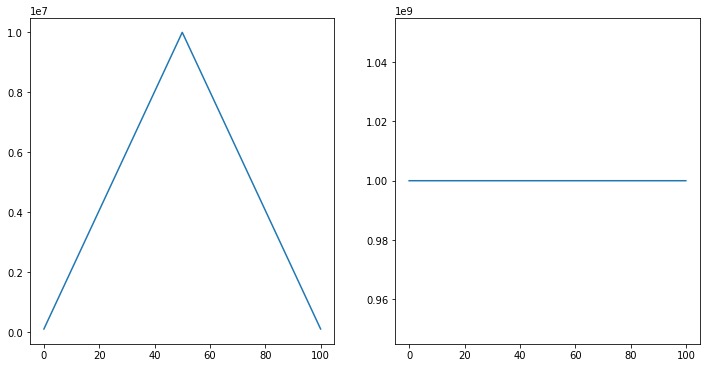

In [22]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.plot(t,T)
plt.subplot(122)
plt.plot(t,n)

In [23]:
el = Element('Fe',np.logspace(4,9,1000)*u.K)

In [24]:
nei = el.non_equilibrium_ionization(t,T,n)

In [25]:
Teff = effective_temperature(el,nei)

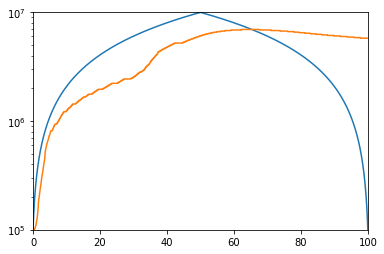

In [26]:
plt.plot(t,T)
plt.plot(t,Teff)
plt.xlim(t[[0,-1]].value)
plt.ylim(Tmin.value,Tmax.value)
plt.yscale('log')

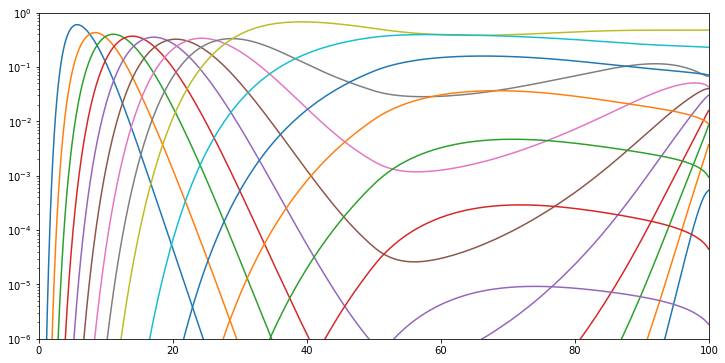

In [27]:
plt.figure(figsize=(12,6))
plt.plot(t,nei[:,8:]);
plt.ylim(1e-6,1)
plt.xlim(t[[0,-1]].value)
plt.yscale('log')

In [28]:
ioneq = el.equilibrium_ionization()

In [29]:
ioneq_interp = interp1d(el.temperature.value, ioneq.value.T, kind='cubic',fill_value='extrapolate')(T.value).T

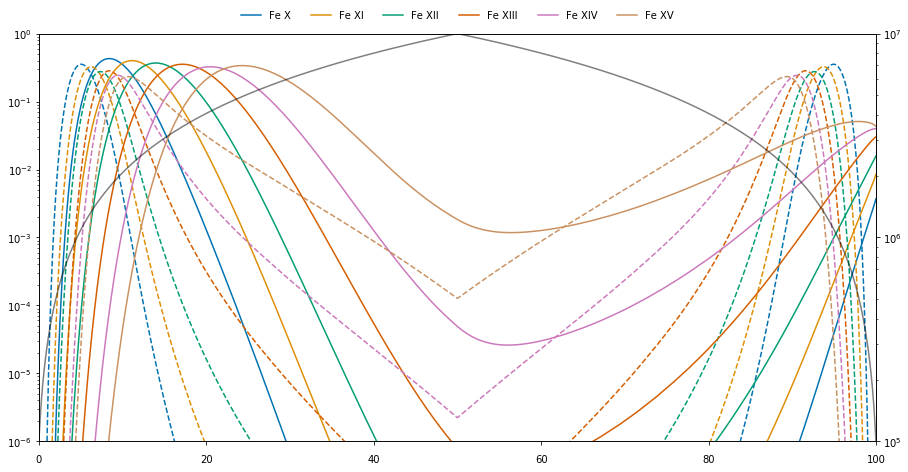

In [72]:
fig = plt.figure(figsize=(15,7.5))
ax = fig.gca()
for i,z in enumerate(range(9,15)):
    ax.plot(t,ioneq_interp[:,z],
             color=seaborn.color_palette('colorblind',el.atomic_number+1)[i],
             ls='--',)
    ax.plot(t,nei[:,z],
             color=seaborn.color_palette('colorblind',el.atomic_number+1)[i],
             ls='-',
             label=f'{el.atomic_symbol} {roman.toRoman(el[z].ionization_stage)}')
ax.set_ylim(1e-6,1)
ax.set_yscale('log')
ax.set_xlim(t[[0,-1]].value)
ax2 = ax.twinx()
ax2.plot(t,T,color='k',ls='-',alpha=0.5)
ax2.set_xlim(t[[0,-1]].value)
ax2.set_ylim(Tmin.value,Tmax.value)
ax2.set_yscale('log')
#plt.xlim(0,200)
ax.legend(ncol=6,bbox_to_anchor=(0.5,1.01),frameon=False,loc='lower center')
ax.tick_params(axis='x', which='both',pad=10)

In [124]:
eps_r = 0.6
eps_d = 0.1

False

In [125]:
np.logical_or(nei[1:,:]/nei[:-1,:] > 10**(eps_r),
              nei[1:,:]/nei[:-1,:] < 10**(-eps_r)).any()

False

In [135]:
t[np.where((np.fabs(nei[1:,:] - nei[:-1,:]) > eps_d*nei[:-1,:]))[0]]

<Quantity [0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11, 0.12, 0.13, 0.14,
           0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22, 0.23, 0.24,
           0.25, 0.26, 0.26, 0.27, 0.27, 0.28, 0.28, 0.29, 0.29, 0.3 ,
           0.3 , 0.31, 0.31, 0.32, 0.32, 0.33, 0.33, 0.34, 0.34, 0.35,
           0.35, 0.36, 0.36, 0.37, 0.37, 0.38, 0.38, 0.39, 0.39, 0.4 ,
           0.4 , 0.41, 0.41, 0.42, 0.42, 0.43, 0.43, 0.44, 0.44, 0.45,
           0.45, 0.46, 0.46, 0.47, 0.47, 0.48, 0.48, 0.49, 0.49, 0.5 ,
           0.5 , 0.51, 0.51, 0.52, 0.52, 0.53, 0.53, 0.54, 0.54, 0.55,
           0.55, 0.56, 0.56, 0.57, 0.57, 0.58, 0.58, 0.59, 0.59, 0.6 ,
           0.6 , 0.61, 0.61, 0.62, 0.62, 0.63, 0.63, 0.64, 0.64, 0.65,
           0.65, 0.66, 0.66, 0.66, 0.67, 0.67, 0.67, 0.68, 0.68, 0.68,
           0.69, 0.69, 0.69, 0.7 , 0.7 , 0.7 , 0.71, 0.71, 0.71, 0.72,
           0.72, 0.72, 0.73, 0.73, 0.73, 0.74, 0.74, 0.74, 0.75, 0.75,
           0.75, 0.76, 0.76, 0.76, 0.77, 0.77, 0.77, 0.78, 0.78, 0.78,
      

In [134]:
print('foo'
      'bar')

foobar
